<a href="https://www.kaggle.com/code/abhisangharora/dm-proj?scriptVersionId=127811404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_124627 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125226 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125656 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125157 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125339 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_115649 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122151(0) (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122241 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_130039 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121859 (Custom).jpg
/kaggle/input/mango-leaf-disease-d

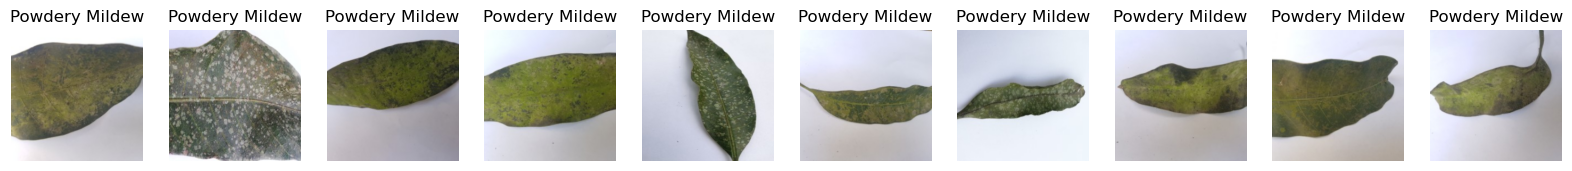

In [3]:
def visualize_dataset(data_dir, img_height, img_width, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for i in range(num_samples):
                file = random.choice(os.listdir(folder_path))
                file_path = os.path.join(folder_path, file)
                if file.endswith('.jpg') or file.endswith('.png'):
                    img = cv2.imread(file_path)
                    img = cv2.resize(img, (img_height, img_width))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[i].imshow(img)
                    axes[i].set_title(folder)
                    axes[i].axis('off')
            break

data_dir = '/kaggle/input/mango-leaf-disease-dataset'
img_height = 256
img_width = 256
visualize_dataset(data_dir, img_height, img_width)


In [4]:
def load_and_preprocess_data(data_dir, img_height, img_width):
    images = []
    labels = []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith('.jpg') or file.endswith('.png'):
                    # Read image
                    img = cv2.imread(file_path)
                    # Resize image
                    img = cv2.resize(img, (img_height, img_width))
                    # Convert image to array
                    img_array = img_to_array(img)
                    # Normalize the image
                    img_array /= 255
                    # Append the image and label to the lists
                    images.append(img_array)
                    labels.append(folder)

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Convert the labels using one-hot encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    return images, onehot_encoded, label_encoder

data_dir = '/kaggle/input/mango-leaf-disease-dataset'
img_height = 256
img_width = 256

X, y, label_encoder = load_and_preprocess_data(data_dir, img_height, img_width)


In [5]:
# Load and preprocess the dataset
# (Implement a function to load and preprocess the images, and convert the labels to a suitable format)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the image data into a 2D array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Standardize the data for non-deep learning algorithms
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_val_std = scaler.transform(X_val_flat)


# Create a dictionary to store the results of each algorithm
results = {}





In [10]:
# CNN
# (Use the code from the previous response to implement the CNN, train the model, and evaluate the results)
# Determine the number of unique labels
num_classes = y.shape[1]

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint])



Epoch 1/10
100/100 [==============================] - 304s 3s/step - loss: 1.3348 - accuracy: 0.4819 - val_loss: 0.7191 - val_accuracy: 0.7287
Epoch 2/10
100/100 [==============================] - 307s 3s/step - loss: 0.5417 - accuracy: 0.8028 - val_loss: 0.5050 - val_accuracy: 0.7875
Epoch 3/10
100/100 [==============================] - 303s 3s/step - loss: 0.3117 - accuracy: 0.8894 - val_loss: 0.3474 - val_accuracy: 0.8763
Epoch 4/10
100/100 [==============================] - 306s 3s/step - loss: 0.2659 - accuracy: 0.9103 - val_loss: 0.2820 - val_accuracy: 0.8863
Epoch 5/10
100/100 [==============================] - 299s 3s/step - loss: 0.2166 - accuracy: 0.9234 - val_loss: 0.2985 - val_accuracy: 0.9087
Epoch 6/10
100/100 [==============================] - 299s 3s/step - loss: 0.1638 - accuracy: 0.9434 - val_loss: 0.2192 - val_accuracy: 0.9275
Epoch 7/10
100/100 [==============================] - 296s 3s/step - loss: 0.1289 - accuracy: 0.9584 - val_loss: 0.4827 - val_accuracy: 0.8650

In [12]:
model.save('cnn.h5')

In [14]:
from tensorflow.keras.models import load_model
loaded_model = load_model('cnn.h5')

# Use the loaded model for testing
y_pred = loaded_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Print classification report and confusion matrix
print(classification_report(y_val_classes, y_pred_classes))
print(confusion_matrix(y_val_classes, y_pred_classes))
# Calculate the accuracy
cnn_accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Add the CNN's accuracy to the results dictionary
results['CNN'] = cnn_accuracy

25/25 [==============================] - 19s 755ms/step
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       112
           1       0.98      0.80      0.88       101
           2       1.00      1.00      1.00        86
           3       0.97      0.94      0.95        93
           4       0.85      0.94      0.89        90
           5       0.98      0.95      0.96        91
           6       0.89      0.96      0.92       123
           7       0.93      0.86      0.89       104

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.92       800

[[108   0   0   1   1   2   0   0]
 [ 11  81   0   1   7   0   0   1]
 [  0   0  86   0   0   0   0   0]
 [  2   0   0  87   2   0   0   2]
 [  1   1   0   1  85   0   2   0]
 [  2   0   0   0   0  86   3   0]
 [  0   0   0   0   1   0 118   4]
 [  0   1   0   0   4   0  10  89]]


In [15]:
print(loaded_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

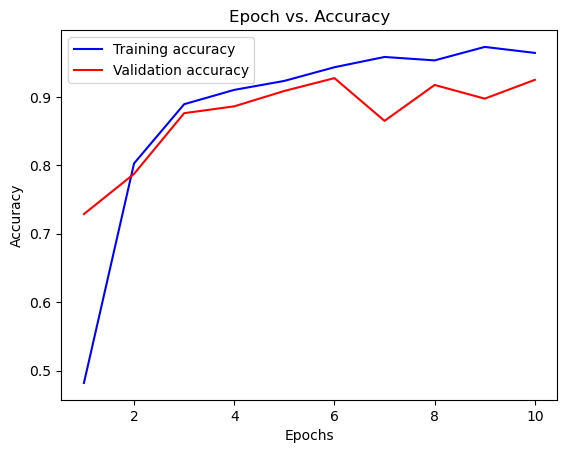

In [16]:
import matplotlib.pyplot as plt

def plot_epoch_vs_accuracy(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Epoch vs. Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_epoch_vs_accuracy(history)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


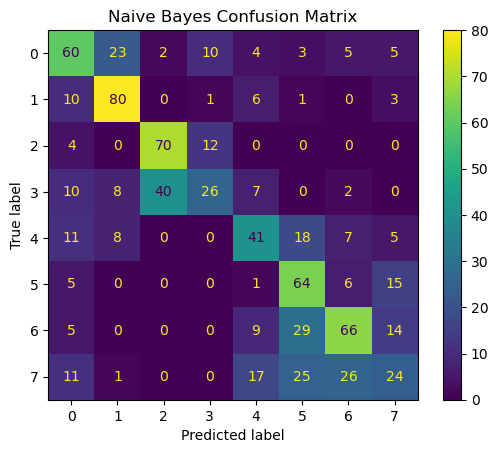

Naive Bayes Model Parameters:
{'priors': None, 'var_smoothing': 1e-09}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


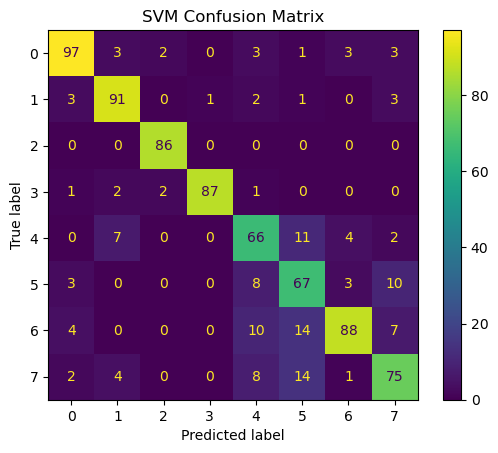

SVM Model Parameters:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


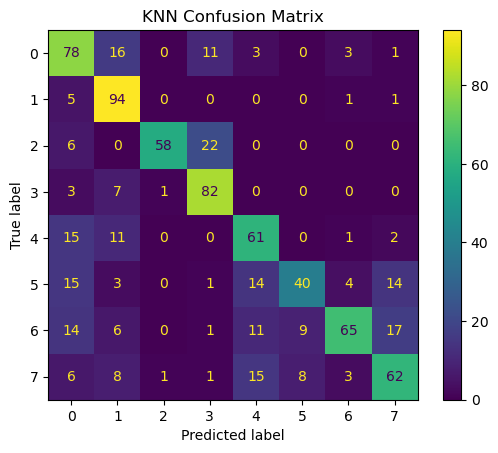

KNN Model Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


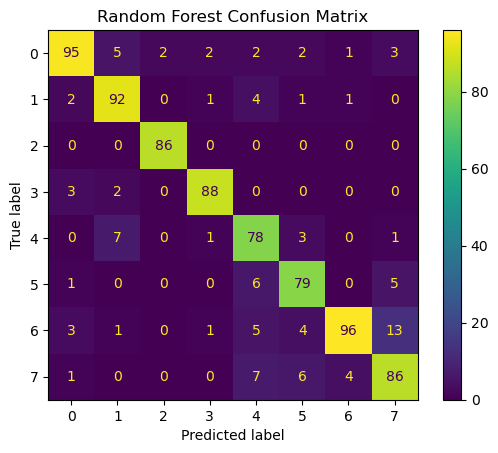

Random Forest Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Convert one-hot encoded labels back to their original format
y_train_classes = np.argmax(y_train, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_std, y_train_classes)
gnb_pred = gnb.predict(X_val_std)
gnb_accuracy = accuracy_score(y_val_classes, gnb_pred)
results['Naive Bayes'] = gnb_accuracy

# Visualize Naive Bayes confusion matrix
plot_confusion_matrix(gnb, X_val_std, y_val_classes)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Print Naive Bayes model parameters
print("Naive Bayes Model Parameters:")
print(gnb.get_params())

# SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_std, y_train_classes)
svm_pred = svm.predict(X_val_std)
svm_accuracy = accuracy_score(y_val_classes, svm_pred)
results['SVM'] = svm_accuracy

# Visualize SVM confusion matrix
plot_confusion_matrix(svm, X_val_std, y_val_classes)
plt.title('SVM Confusion Matrix')
plt.show()

# Print SVM model parameters
print("SVM Model Parameters:")
print(svm.get_params())

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train_classes)
knn_pred = knn.predict(X_val_std)
knn_accuracy = accuracy_score(y_val_classes, knn_pred)
results['KNN'] = knn_accuracy

# Visualize KNN confusion matrix
plot_confusion_matrix(knn, X_val_std, y_val_classes)
plt.title('KNN Confusion Matrix')
plt.show()

# Print KNN model parameters
print("KNN Model Parameters:")
print(knn.get_params())

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_std, y_train_classes)
rf_pred = rf.predict(X_val_std)
rf_accuracy = accuracy_score(y_val_classes, rf_pred)
results['Random Forest'] = rf_accuracy

# Visualize Random Forest confusion matrix
plot_confusion_matrix(rf, X_val_std, y_val_classes)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Print Random Forest model parameters
print("Random Forest Model Parameters:")
print(rf.get_params())


Accuracy Scores:
Naive Bayes: 0.53875
SVM: 0.82125
KNN: 0.675
Random Forest: 0.875
CNN: 0.925


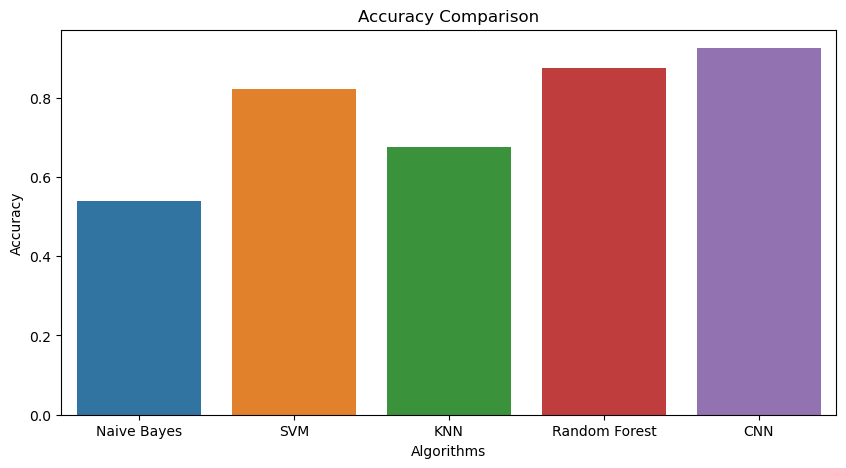

In [17]:


# Display the accuracy scores
print("Accuracy Scores:")
for algorithm, accuracy in results.items():
    print(f"{algorithm}: {accuracy}")

# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()
